# Supervised Machine Learning with Scikit-learn

## Objectives
- Load and explore the Wine dataset
- Preprocess the data (scaling and splitting)
- Train and evaluate multiple classification models using Scikit-learn
- Compare results and visualize performance

Dataset: **Wine classification** (multiclass classification)


In [48]:
# Import required libraries
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

from sklearn.datasets import load_wine
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import classification_report, accuracy_score, ConfusionMatrixDisplay


## Part 1: Load and Explore the Dataset

In [49]:
# Load wine dataset
wine = load_wine()
X = pd.DataFrame(wine.data, columns=wine.feature_names)
y = pd.Series(wine.target, name="class")

# Show the first few rows
X.head()

,alcohol,malic_acid,ash,alcalinity_of_ash,magnesium,total_phenols,flavanoids,nonflavanoid_phenols,proanthocyanins,color_intensity,hue,od280/od315_of_diluted_wines,proline
0,14.23,1.71,2.43,15.6,127.0,2.80,3.06,0.28,2.29,5.64,1.04,3.92,1065.0
1,13.20,1.78,2.14,11.2,100.0,2.65,2.76,0.26,1.28,4.38,1.05,3.40,1050.0
2,13.16,2.36,2.67,18.6,101.0,2.80,3.24,0.30,2.81,5.68,1.03,3.17,1185.0
3,14.37,1.95,2.50,16.8,113.0,3.85,3.49,0.24,2.18,7.80,0.86,3.45,1480.0
4,13.24,2.59,2.87,21.0,118.0,2.80,2.69,0.39,1.82,4.32,1.04,2.93,735.0


In [50]:
# Class distribution
y.value_counts()

class
1    71
0    59
2    48
Name: count, dtype: int64

In [51]:
# Dataset description
print(wine.DESCR)

.. _wine_dataset:

Wine recognition dataset
------------------------

**Data Set Characteristics:**

:Number of Instances: 178
:Number of Attributes: 13 numeric, predictive attributes and the class
:Attribute Information:
    - Alcohol
    - Malic acid
    - Ash
    - Alcalinity of ash
    - Magnesium
    - Total phenols
    - Flavanoids
    - Nonflavanoid phenols
    - Proanthocyanins
    - Color intensity
    - Hue
    - OD280/OD315 of diluted wines
    - Proline
    - class:
        - class_0
        - class_1
        - class_2

:Summary Statistics:

============================= ==== ===== ======= =====
                                Min   Max   Mean     SD
============================= ==== ===== ======= =====
Alcohol:                      11.0  14.8    13.0   0.8
Malic Acid:                   0.74  5.80    2.34  1.12
Ash:                          1.36  3.23    2.36  0.27
Alcalinity of Ash:            10.6  30.0    19.5   3.3
Magnesium:                    70.0 162.0    99.7  14.3

## Part 2: Data Preprocessing

In [52]:
# Standardize features
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

In [53]:
# Train-test split
X_train, X_test, y_train, y_test = train_test_split(
    X_scaled, y, test_size=0.2, random_state=42, stratify=y)

## Part 3: Train and Evaluate Models

=== Régression Logistique ===
Accuracy: 0.9722222222222222
              precision    recall  f1-score   support

           0       1.00      1.00      1.00        12
           1       0.93      1.00      0.97        14
           2       1.00      0.90      0.95        10

    accuracy                           0.97        36
   macro avg       0.98      0.97      0.97        36
weighted avg       0.97      0.97      0.97        36



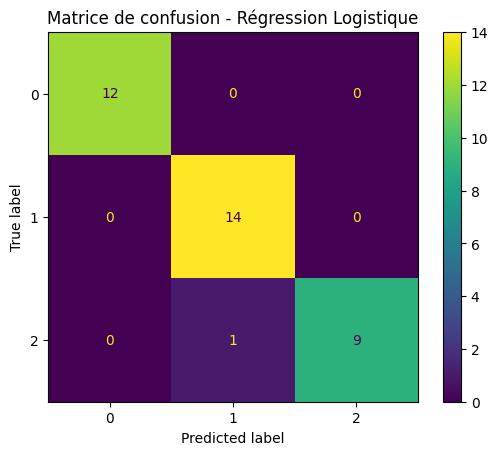

In [54]:
# TO DO:
# Apply: 
#       (1) Logistic Regression
log_reg = LogisticRegression(random_state=42, max_iter=1000)
log_reg.fit(X_train, y_train)
y_pred_lr = log_reg.predict(X_test)

print("=== Régression Logistique ===")
print("Accuracy:", accuracy_score(y_test, y_pred_lr))
print(classification_report(y_test, y_pred_lr))

ConfusionMatrixDisplay.from_estimator(log_reg, X_test, y_test)
plt.title("Matrice de confusion - Régression Logistique")
plt.show()

=== k-Nearest Neighbors ===
Accuracy: 0.9722222222222222
              precision    recall  f1-score   support

           0       1.00      1.00      1.00        12
           1       1.00      0.93      0.96        14
           2       0.91      1.00      0.95        10

    accuracy                           0.97        36
   macro avg       0.97      0.98      0.97        36
weighted avg       0.97      0.97      0.97        36



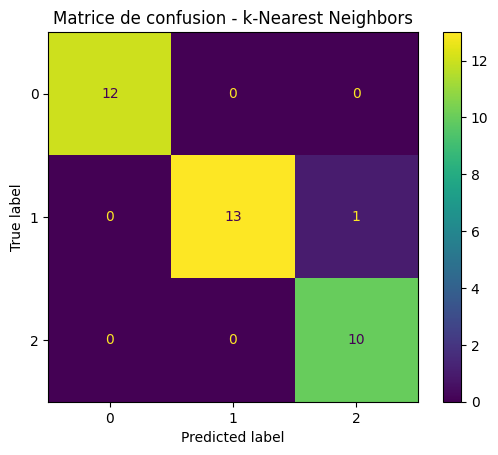

In [55]:
#       (2) k-Nearest Neighbors
knn = KNeighborsClassifier(n_neighbors=5)
knn.fit(X_train, y_train)
y_pred_knn = knn.predict(X_test)

print("=== k-Nearest Neighbors ===")
print("Accuracy:", accuracy_score(y_test, y_pred_knn))
print(classification_report(y_test, y_pred_knn))

ConfusionMatrixDisplay.from_estimator(knn, X_test, y_test)
plt.title("Matrice de confusion - k-Nearest Neighbors")
plt.show()

=== Random Forest Classifier ===
Accuracy: 1.0
              precision    recall  f1-score   support

           0       1.00      1.00      1.00        12
           1       1.00      1.00      1.00        14
           2       1.00      1.00      1.00        10

    accuracy                           1.00        36
   macro avg       1.00      1.00      1.00        36
weighted avg       1.00      1.00      1.00        36



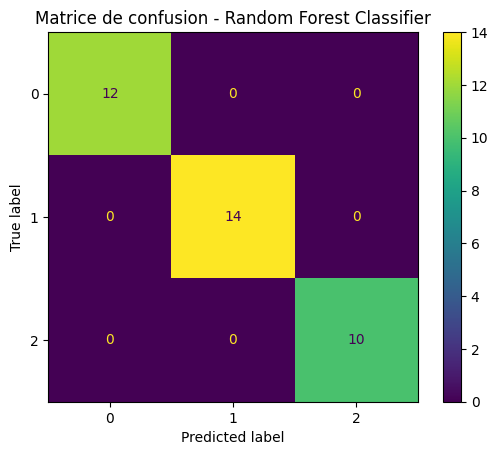

In [56]:
#       (3) Logistic Regression
rf = RandomForestClassifier(random_state=42, n_estimators=100)
rf.fit(X_train, y_train)
y_pred_rf = rf.predict(X_test)

print("=== Random Forest Classifier ===")
print("Accuracy:", accuracy_score(y_test, y_pred_rf))
print(classification_report(y_test, y_pred_rf))

ConfusionMatrixDisplay.from_estimator(rf, X_test, y_test)
plt.title("Matrice de confusion - Random Forest Classifier")
plt.show()

## Part 4: Visualization and Comparison

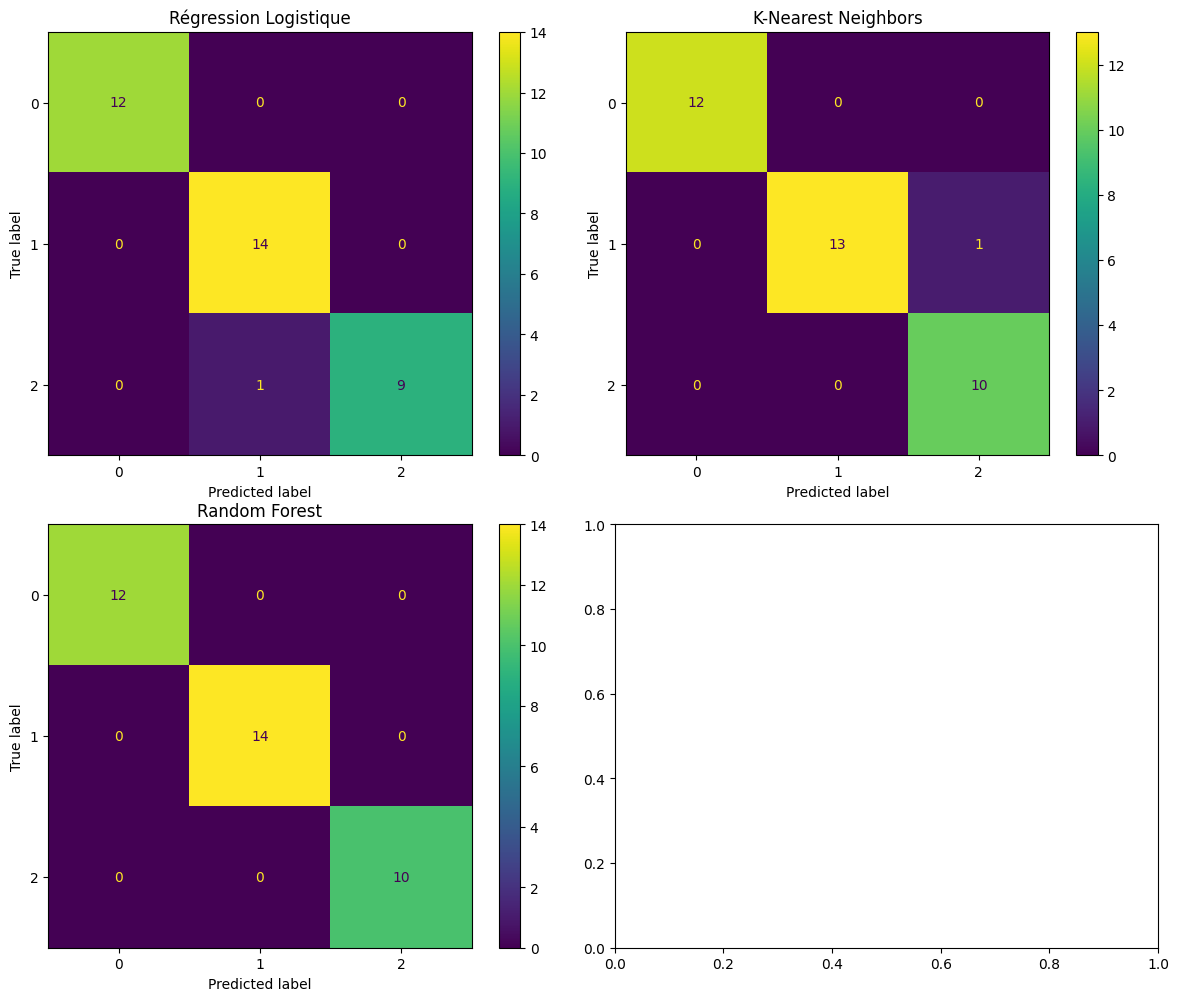

In [57]:
# TO DO: plot the confusion matrix for the results obtained from each estimator
#        you may use: ConfusionMatrixDisplay.from_estimator(model, X_test, y_test)

fig, ax = plt.subplots(2, 2, figsize=(12, 10))

ConfusionMatrixDisplay.from_estimator(log_reg, X_test, y_test, ax=ax[0, 0])
ax[0, 0].set_title("Régression Logistique")

ConfusionMatrixDisplay.from_estimator(knn, X_test, y_test, ax=ax[0, 1])
ax[0, 1].set_title("K-Nearest Neighbors")

ConfusionMatrixDisplay.from_estimator(rf, X_test, y_test, ax=ax[1, 0])
ax[1, 0].set_title("Random Forest")

plt.tight_layout()
plt.show()

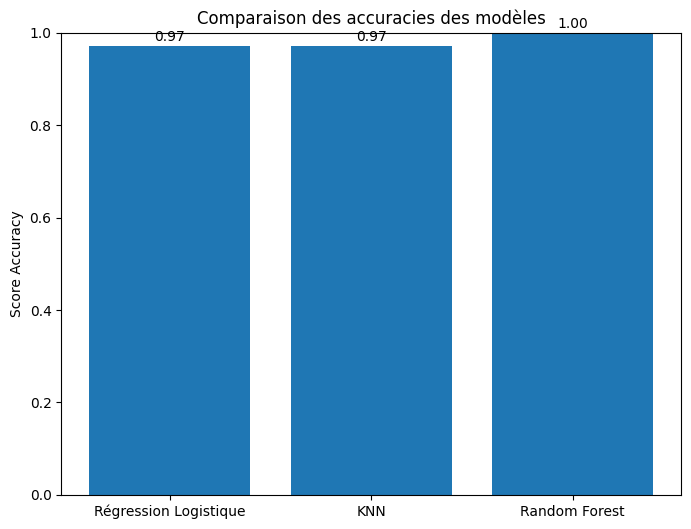

In [58]:
# TO DO: use plt.bar() to plot the bar chart of model accuracy
#        To calculate accuracies, you may use: accuracy_score(y_test, model.predict(X_test))

models = ['Régression Logistique', 'KNN', 'Random Forest']
accuracies = [
    accuracy_score(y_test, log_reg.predict(X_test)),
    accuracy_score(y_test, knn.predict(X_test)),
    accuracy_score(y_test, rf.predict(X_test))
]

plt.figure(figsize=(8, 6))
plt.bar(models, accuracies)
plt.ylabel("Score Accuracy")
plt.title("Comparaison des accuracies des modèles")
plt.ylim([0, 1])

for i, v in enumerate(accuracies):
    plt.text(i, v + 0.01, f"{v:.2f}", ha='center')
plt.show()



### Optional Extensions:
- Tune `k` in KNN using a loop (plot model accuracies for k = 1 to 20).
- Try DecisionTreeClassifier


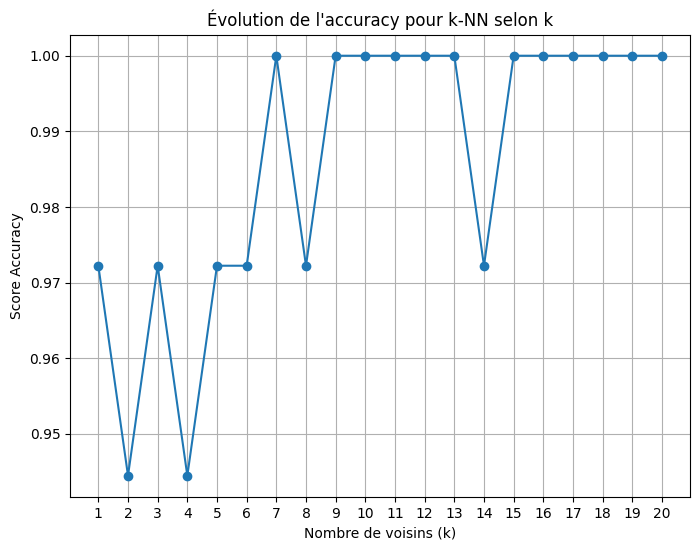

In [59]:
knn_accuracies = []
k_values = list(range(1, 21))

for k in k_values:
    knn_temp = KNeighborsClassifier(n_neighbors=k)
    knn_temp.fit(X_train, y_train)
    acc = accuracy_score(y_test, knn_temp.predict(X_test))
    knn_accuracies.append(acc)

plt.figure(figsize=(8, 6))
plt.plot(k_values, knn_accuracies, marker='o')
plt.xlabel("Nombre de voisins (k)")
plt.ylabel("Score Accuracy")
plt.title("Évolution de l'accuracy pour k-NN selon k")
plt.xticks(k_values)
plt.grid(True)
plt.show()